# 

### Importing required libraries : 

In [1]:
import math
import time

import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential, load_model

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from tqdm import tqdm
import xgboost

In [2]:
#setting a seed
np.random.seed(42)

In [3]:
pwd

'/home/yash/projects/prognostics_thesis'

In [4]:
ls -g CMAPSSData/

total 44324
-rw-r--r-- 1 yash   434158 Oct  3  2008 'Damage Propagation Modeling.pdf'
-rw-r--r-- 1 yash     2442 Oct  3  2008  readme.txt
-rw-r--r-- 1 yash      429 Oct  2  2008  RUL_FD001.txt
-rw-r--r-- 1 yash     1110 Oct  2  2008  RUL_FD002.txt
-rw-r--r-- 1 yash      428 Oct  2  2008  RUL_FD003.txt
-rw-r--r-- 1 yash     1084 Oct  2  2008  RUL_FD004.txt
-rw-r--r-- 1 yash  2228855 Mar 25  2008  test_FD001.txt
-rw-r--r-- 1 yash  5734587 Sep 17  2008  test_FD002.txt
-rw-r--r-- 1 yash  2826651 Mar 25  2008  test_FD003.txt
-rw-r--r-- 1 yash  6957759 Sep 17  2008  test_FD004.txt
-rw-r--r-- 1 yash  3515356 Mar 25  2008  train_FD001.txt
-rw-r--r-- 1 yash  9082480 Sep 17  2008  train_FD002.txt
-rw-r--r-- 1 yash  4213862 Mar 25  2008  train_FD003.txt
-rw-r--r-- 1 yash 10350705 Sep 17  2008  train_FD004.txt


In [5]:
#Loading Dataset files into the notebook: 

train_FD001 = pd.read_csv('./CMAPSSData/train_FD001.txt', sep = " ", header = None)
train_FD002 = pd.read_csv('./CMAPSSData/train_FD002.txt', sep = " ", header = None)
train_FD003 = pd.read_csv('./CMAPSSData/train_FD003.txt', sep = " ", header = None)
train_FD004 = pd.read_csv('./CMAPSSData/train_FD004.txt', sep = " ", header = None)

test_FD001 = pd.read_csv('./CMAPSSData/test_FD001.txt', sep = " ", header = None)
test_FD002 = pd.read_csv('./CMAPSSData/test_FD002.txt', sep = " ", header = None)
test_FD003 = pd.read_csv('./CMAPSSData/test_FD003.txt', sep = " ", header = None)
test_FD004 = pd.read_csv('./CMAPSSData/test_FD004.txt', sep = " ", header = None)

In [6]:
#Description of first dataset file : 
train_FD001.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN


Since the last two columns are empty, they are removed from the dataset.

In [7]:
train_FD001.drop(columns = [26, 27], inplace  = True)
train_FD002.drop(columns = [26, 27], inplace  = True)
train_FD003.drop(columns = [26, 27], inplace  = True)
train_FD004.drop(columns = [26, 27], inplace  = True)

test_FD001.drop(columns = [26, 27], inplace  = True)
test_FD002.drop(columns = [26, 27], inplace  = True)
test_FD003.drop(columns = [26, 27], inplace  = True)
test_FD004.drop(columns = [26, 27], inplace  = True)

Labelling every column with the representative parameter : 

In [8]:
column_labels = ['unit_number', 'time_in_cycles', 'setting_1', 'setting_2', 'TRA', 'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']

In [9]:
#Adding labels to all training sets :
train_FD001.columns = column_labels
train_FD002.columns = column_labels
train_FD003.columns = column_labels
train_FD004.columns = column_labels

test_FD001.columns = column_labels
test_FD002.columns = column_labels
test_FD003.columns = column_labels
test_FD004.columns = column_labels

In [10]:
train_FD001.describe()

,unit_number,time_in_cycles,setting_1,setting_2,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [ ]:
#deleting columns with constant values ​​that do not carry information about the state of the unit
fd_001_train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','TRA','farB','epr'],inplace=True)

Writing a function to prepare training set and creating an extra RUL column with information about remaining useful life :

In [13]:
def prep_train_set(data, factor = 0):
    df = data.copy()
    fd_RUL = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
    fd_RUL.columns = ['unit_number', 'max']
    df = df.merge(fd_RUL, on = ['unit_number'], how = 'left')
    df['RUL'] = df['max'] - df['time_in_cycles']
    df.drop(columns = ['max'], inplace = True)

    return df[df['time_in_cycles'] > factor]

In [15]:
df = prep_train_set(train_FD001)

Drawing a Heatmap for all Parameters as follows : 

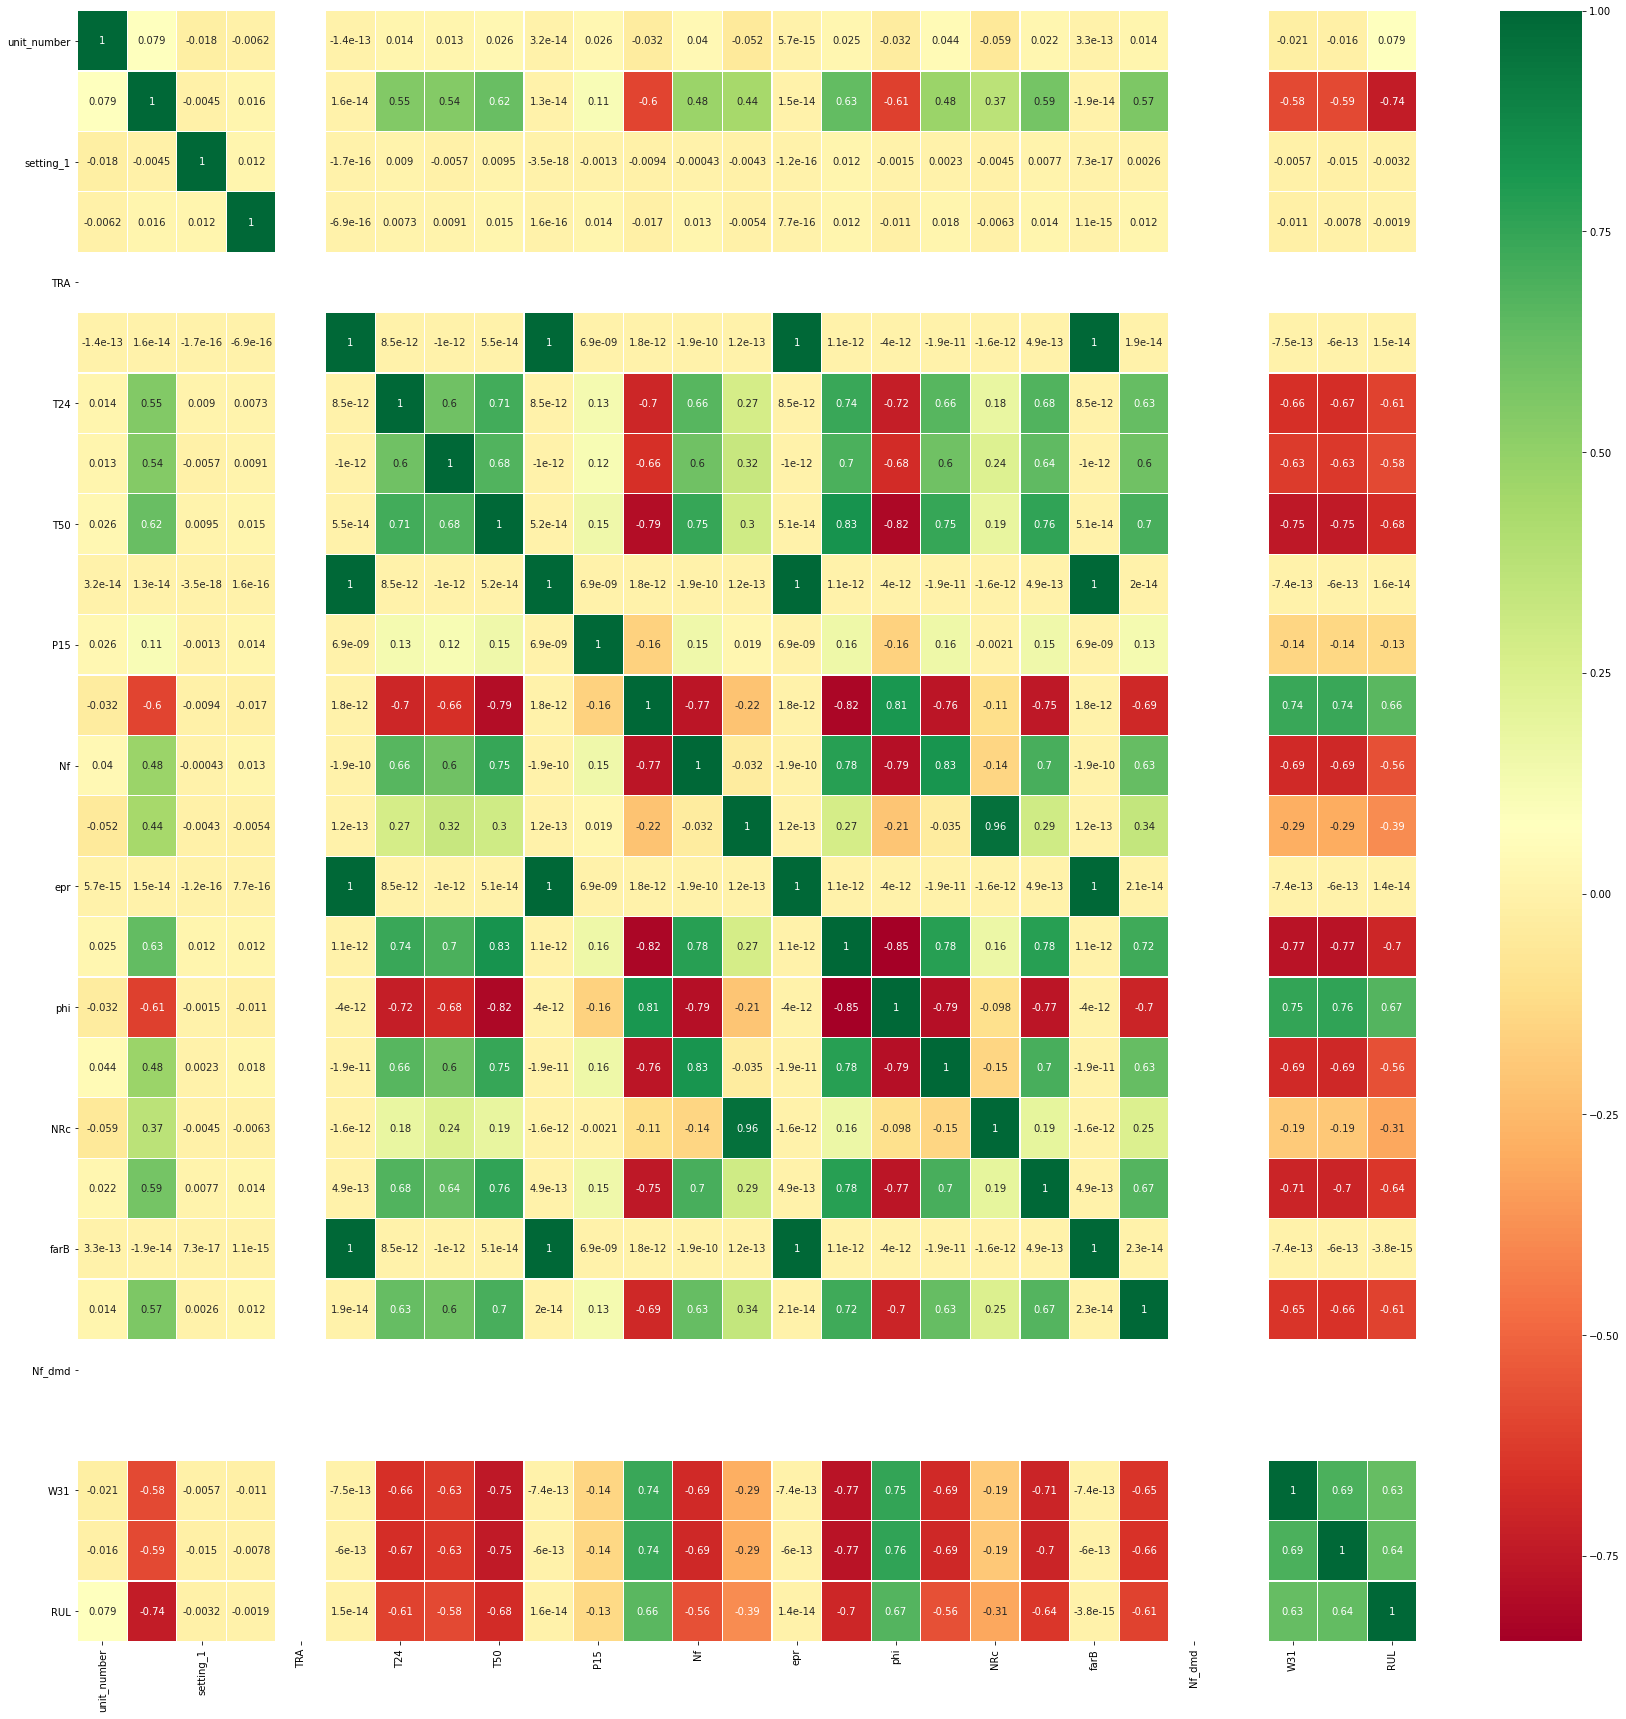

In [18]:
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', linewidths = 0.1)
fig = plt.gcf()
fig.set_size_inches(30,30)
plt.show()